### Chapter 04 다양한 분류 알고리즘 ▶️럭키백의 확률을 계산하라!

#### 04-2 확률적 경사 하강법 ▶️경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하기

#### [ loss function 의 정의 ] 
- target = 1일때 손실은 -log(예측확률), 즉 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다. 
- target - 0일때 손실은 -log(1-예측확률), 즉 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
## data를 불러와 input, target을 분리
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42) 

In [4]:
## data 표준화 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape)
print(test_scaled.shape)

(119, 5)
(40, 5)


In [5]:
## 확률적 경사 하강법(stochastic gradient descent) 사용하기 : 손실함수 = log, 반복 epochs = 100 
## 참고. max_iter의 default값은 1000이다. 
## 참고. tol의 default값은 0.001이다. 즉 epoch동안 loss값이 0.001이상 줄어들지 않으면 훈련을 멈춘다. 
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print( sc.score(train_scaled, train_target) )
print( sc.score(test_scaled, test_target) )

0.957983193277311
0.925


In [6]:
## 사실 손실함수의 default는 hinge이다. 
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print( sc.score(train_scaled, train_target) )
print( sc.score(test_scaled, test_target) )

0.9495798319327731
0.925


In [7]:
sc_2 = SGDClassifier(random_state = 42)
sc_2.fit(train_scaled, train_target)

print( sc_2.score(train_scaled, train_target) )
print( sc_2.score(test_scaled, test_target) )

0.907563025210084
0.925


-------------------------------------
## 참고

In [8]:
## partial_fit()은 학습된 모델을 다시 돌리지 않고, 1 epoch만 추가 실행한다.
## under or over fitting 여부를 확인하는데 유용하다. 
sc.partial_fit(train_scaled, train_target)

print( sc.score(train_scaled, train_target) )
print( sc.score(test_scaled, test_target) )

0.907563025210084
0.925


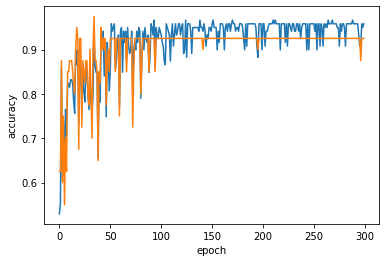

In [9]:
## under/over fitting을 최소화히기 위해, 몇번의 epochs(반복횟수, max_iter값)가 적당한지 알아보기 
## epoch가 반볼될수록 변화되는 양상을 알기 위해 partial_fit을 사용했으며, 때문에 target값인 7개 생선의 이름을 classes에 전달해주었다. 
sc = SGDClassifier(loss='log')
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300): 
    sc.partial_fit(train_scaled, train_target, classes = classes) 
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()